In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind, spearmanr
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from scipy.stats import levene, ttest_ind, pearsonr
import math
from scipy import stats
import numpy as np
import os
from scipy import stats
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
import re
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df=w.get_explore_data()

In [4]:
df=w.prep_data(df, features=w.features)

In [5]:
df=w.rename_data(df)

In [6]:
df

region  elevation  lat       lon  startdate  potential_evap  precip  \
0         BSh        200  0.0  0.833333 2014-09-01          237.00   94.31   
1         BSh        200  0.0  0.833333 2014-09-02          228.90  100.85   
2         BSh        200  0.0  0.833333 2014-09-03          220.69  101.25   
3         BSh        200  0.0  0.833333 2014-09-04          225.28  101.90   
4         BSh        200  0.0  0.833333 2014-09-05          237.24   82.95   
...       ...        ...  ...       ...        ...             ...     ...   
375729    Dfb        100  1.0  0.866667 2016-08-27          312.05   57.45   
375730    Dfb        100  1.0  0.866667 2016-08-28          305.82   53.53   
375731    Dfb        100  1.0  0.866667 2016-08-29          311.62   52.12   
375732    Dfb        100  1.0  0.866667 2016-08-30          304.54   51.73   
375733    Dfb        100  1.0  0.866667 2016-08-31          295.29   51.83   

        barometric_pressure  all_atmos_precip  relative_humidity  \
0                  98644.97             42.45              81.72   
1                  98686.80             42.66              82.56   
2                  98712.85             43.23              83.29   
3                  98711.70             43.11              83.26   
4                  98686.46             42.98              82.50   
...                     ...               ...                ...   
375729             97613.96             24.32              70.25   
375730             97631.29             23.92              71.08   
375731             97588.69             23.94              69.74   
375732             97538.62             23.61              69.71   
375733             97536.84             23.41              71.66   

        sea_level_press  mean_temp  height_10_mb  height_100_mb  \
0             101352.08  28.744480      31246.63       16666.81   
1             101396.02  28.370585      31244.78       16667.31   
2             101429.25  28.133059      31239.27       16668.39   
3             101440.85  28.256798      31232.86       16667.39   
4             101419.53  28.372353      31226.16       16665.65   
...                 ...        ...           ...            ...   
375729        101373.91  17.150954      31484.23       16540.22   
375730        101397.77  16.962051      31476.67       16534.71   
375731        101368.67  16.915474      31464.71       16526.98   
375732        101321.24  16.536761      31448.83       16512.39   
375733        101323.84  15.910995      31434.76       16496.42   

        height_500_mb  height_850_mb  zonal_wind_250mb  zonal_wind_925mb  \
0             5899.66        1535.52             -2.56             -5.22   
1             5901.03        1538.00             -2.39             -5.20   
2             5902.18        1540.32             -2.76             -5.00   
3             5903.07        1541.10             -3.00             -4.61   
4             5903.36        1539.73             -3.40             -4.25   
...               ...            ...               ...               ...   
375729        5763.23        1501.92             23.20              1.32   
375730        5760.19        1502.70             23.18              1.40   
375731        5754.76        1499.57             24.49              1.75   
375732        5742.21        1493.14             25.80              1.84   
375733        5726.45        1489.03             26.62              2.07   

        long_wind_250mb  long_wind_925mb  
0                 -3.52             4.41  
1                 -4.49             3.74  
2                 -5.44             3.40  
3                 -5.76             3.29  
4                 -6.09             3.27  
...                 ...              ...  
375729             9.59             2.96  
375730             7.14             2.30  
375731             7.05             2.19  
375732             7.74             1.88  
375733             8.29             1.66  

[375734 rows x 20 

In [ ]:
barometric_pressure relative_humidity	

<AxesSubplot:xlabel='barometric_pressure', ylabel='mean_temp'>

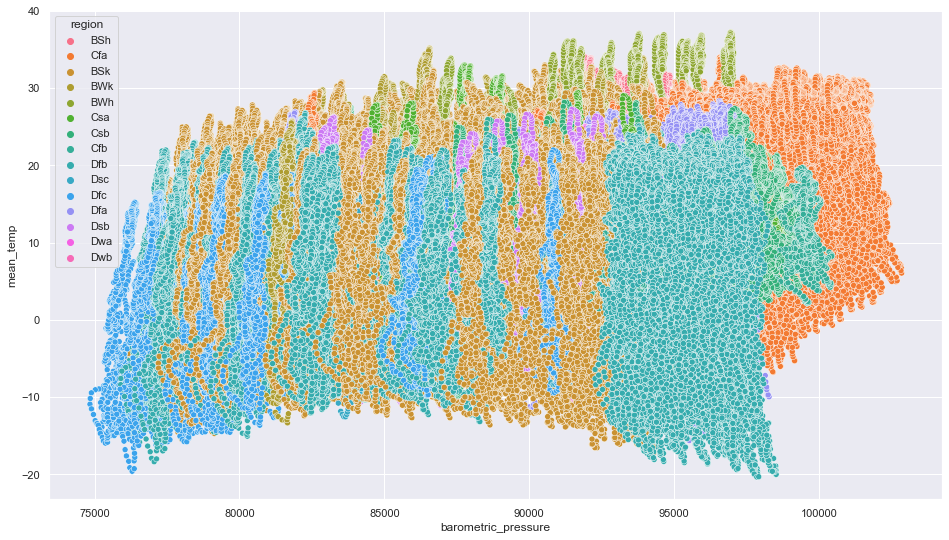

In [8]:
sns.scatterplot(x='barometric_pressure', y='mean_temp', hue='region', data= df)

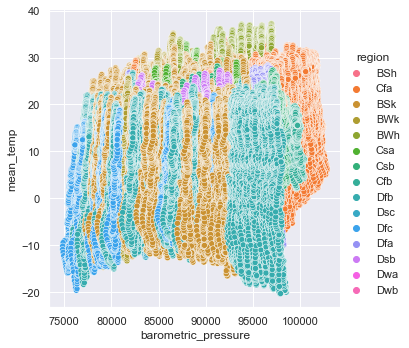

In [11]:
sns.relplot(data=df, x="barometric_pressure", y="mean_temp", hue="region")

<AxesSubplot:xlabel='relative_humidity', ylabel='mean_temp'>

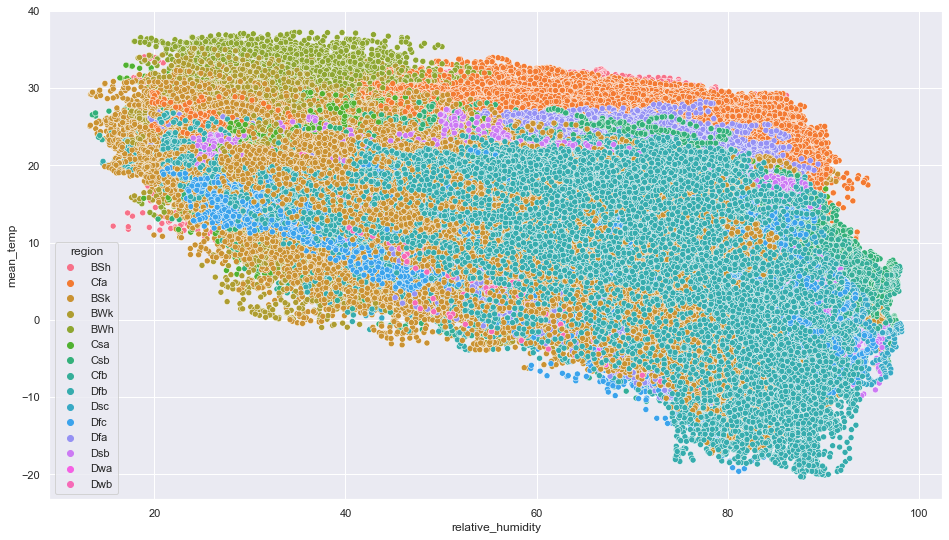

In [13]:
sns.scatterplot(x='relative_humidity', y='mean_temp', hue='region', data= df)

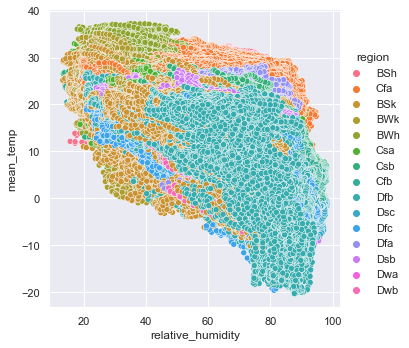

In [14]:
sns.relplot(data=df, x="relative_humidity", y="mean_temp", hue="region")

<AxesSubplot:xlabel='relative_humidity', ylabel='barometric_pressure'>

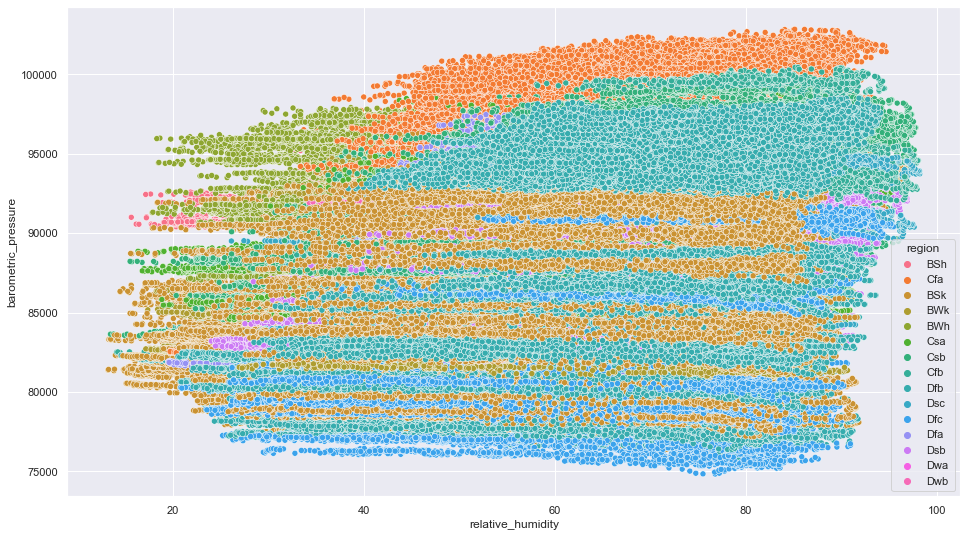

In [15]:
sns.scatterplot(x='relative_humidity', y="barometric_pressure", hue='region', data= df)

In [17]:
rows = df.sample(frac =.01)

<AxesSubplot:xlabel='relative_humidity', ylabel='barometric_pressure'>

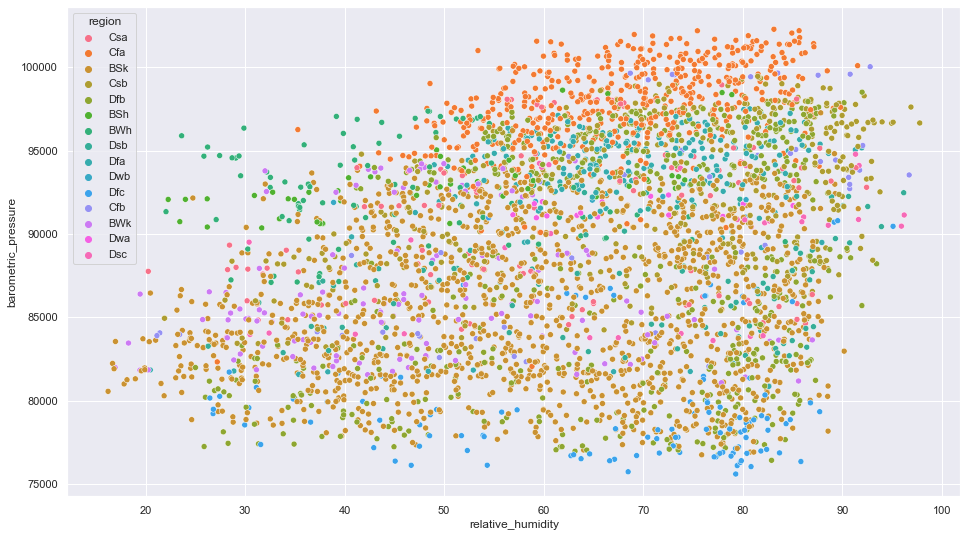

In [18]:
sns.scatterplot(x='relative_humidity', y="barometric_pressure", hue='region', data= rows)

<AxesSubplot:xlabel='relative_humidity', ylabel='mean_temp'>

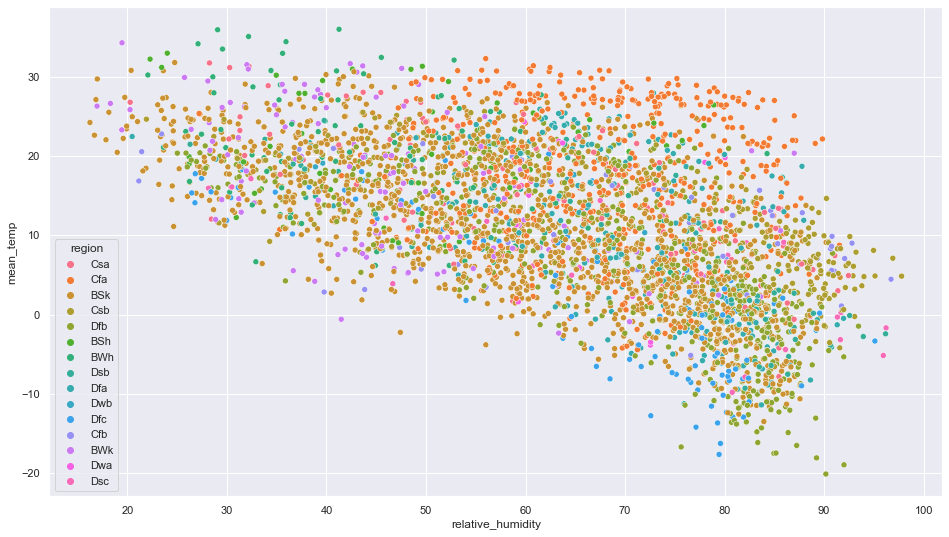

In [19]:
sns.scatterplot(x='relative_humidity', y='mean_temp', hue='region', data= rows)

<AxesSubplot:xlabel='barometric_pressure', ylabel='mean_temp'>

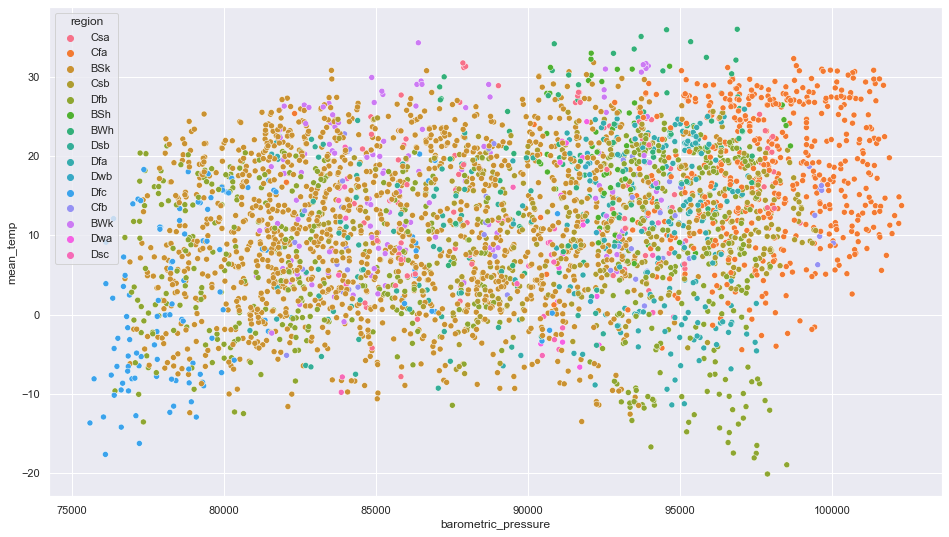

In [20]:
sns.scatterplot(x='barometric_pressure', y='mean_temp', hue='region', data= rows)

In [ ]:
relative_humidity barometric_pressure mean_temp region

In [36]:
list1 = rows['barometric_pressure']
list2 = rows['mean_temp']
corr, p = spearmanr(list1, list2)
print('Spearman correlation: %.3f' % corr)
print('P: %.3f' % p)

Spearman correlation: 0.252
P: 0.000


In [31]:
list1 = rows['relative_humidity']
list2 = rows['mean_temp']
corr, p = spearmanr(list1, list2)
print('Spearman correlation: %.3f' % corr)
print('P: %.3f' % p)

Pearsons correlation: -0.573
P: 0.000


In [32]:
list1 = rows['relative_humidity']
list2 = rows['barometric_pressure']
corr, p = spearmanr(list1, list2)
print('Spearman correlation: %.3f' % corr)
print('P: %.3f' % p)

Pearsons correlation: 0.264
P: 0.000
